# ACHMAD NUR BANI SUTA (2209106016)
## Posttest 7

### Mengekstrak Folder Dataset

LINK DATASET : https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset/data

LINK DATASET YANG DIGABUNG ULANG : https://drive.google.com/file/d/1ECMDwcVpvTu4thRnZxO1VPkeu7U8b1eC/view?usp=sharing

In [2]:
!unzip '/content/drive/MyDrive/dataset_image.zip'

Archive:  /content/drive/MyDrive/dataset_image.zip
   creating: dataset_image/adidas/
  inflating: dataset_image/adidas/aadidas_ (10).jpg  
  inflating: dataset_image/adidas/aadidas_ (11).jpg  
  inflating: dataset_image/adidas/aadidas_ (12).jpg  
  inflating: dataset_image/adidas/aadidas_ (13).jpg  
  inflating: dataset_image/adidas/aadidas_ (14).jpg  
  inflating: dataset_image/adidas/aadidas_ (15).jpg  
  inflating: dataset_image/adidas/aadidas_ (16).jpg  
  inflating: dataset_image/adidas/aadidas_ (17).jpg  
  inflating: dataset_image/adidas/aadidas_ (18).jpg  
  inflating: dataset_image/adidas/aadidas_ (19).jpg  
  inflating: dataset_image/adidas/aadidas_ (2).jpg  
  inflating: dataset_image/adidas/aadidas_ (20).jpg  
  inflating: dataset_image/adidas/aadidas_ (21).jpg  
  inflating: dataset_image/adidas/aadidas_ (22).jpg  
  inflating: dataset_image/adidas/aadidas_ (23).jpg  
  inflating: dataset_image/adidas/aadidas_ (24).jpg  
  inflating: dataset_image/adidas/aadidas_ (3).jpg 

### Membagi folder dataset

In [3]:
!pip install split-folders

In [5]:
splitfolders.ratio("dataset_image",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

Copying files: 575 files [00:00, 4336.32 files/s]


Folder Dataset dibagi dengan rasio 80% train, 10% test, dan 10% val

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Mengubah Bentuk Dari Train dan Val

In [7]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [8]:
train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 459 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


### Import Library

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Membuat Model

In [10]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # 2. fully connected layer
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### Membuat Callback

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

### Melatih Model

In [12]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 20s 499ms/step - loss: 0.9626 - accuracy: 0.5054 - val_loss: 0.6911 - val_accuracy: 0.5179
Epoch 2/50
15/15 [==============================] - 5s 363ms/step - loss: 0.6979 - accuracy: 0.5098 - val_loss: 0.6832 - val_accuracy: 0.6429
Epoch 3/50
15/15 [==============================] - 5s 355ms/step - loss: 0.6691 - accuracy: 0.5730 - val_loss: 0.6710 - val_accuracy: 0.6429
Epoch 4/50
15/15 [==============================] - 7s 446ms/step - loss: 0.6581 - accuracy: 0.6231 - val_loss: 0.6472 - val_accuracy: 0.7500
Epoch 5/50
15/15 [==============================] - 6s 364ms/step - loss: 0.6426 - accuracy: 0.6427 - val_loss: 0.5974 - val_accuracy: 0.7679
Epoch 6/50
15/15 [==============================] - 6s 367ms/step - loss: 0.6213 - accuracy: 0.6645 - val_loss: 0.5931 - val_accuracy: 0.7321
Epoch 7/50
15/15 [==============================] - 5s 350ms/step - loss: 0.5861 - accuracy: 0.7015 - val_loss: 0.5510 - val_accuracy: 0.7857
Epoch 8/50
15/15

### Mengubah Bentuk dari Test

In [14]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


### Mengecek Hasil dari Model

In [15]:
model.evaluate(test_generator)

2/2 [==============================] - 1s 398ms/step - loss: 0.9658 - accuracy: 0.7500


[0.9658321738243103, 0.75]

### Membuat Hasil Plot

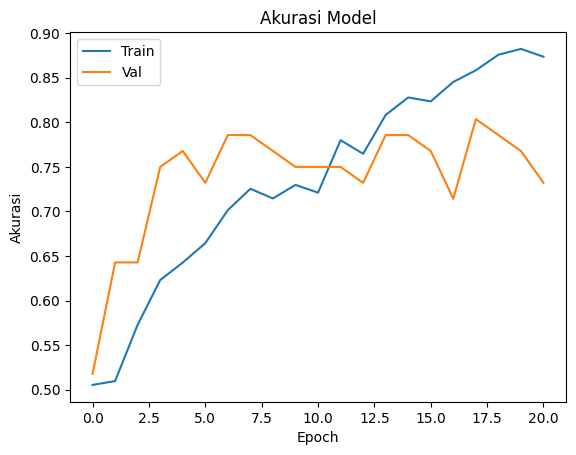

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dari hasil di atas dapat kita lihat bahwa hasil train mencapai 80% sedangkan hasil dari test hanya di sekitar 70%

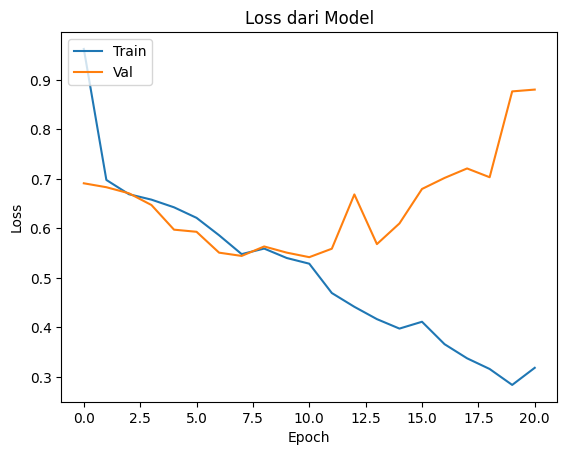

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dari hasil di atas dapat kita lihat bahwa hasil train mencapai di bawah 50% sedangkan hasil dari test hanya di sekitar di atas dari 79%